In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

In [2]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole
from smileRandomizer import *

In [3]:
import pandas as pd
f = [e.strip() for e in open('retrosynthesis-all.smi.txt').readlines() ]

In [4]:
products =[e.split(' >> ')[0].strip() for e in f]
reactant = [e.split(' >> ')[0].strip() for e in f]

In [16]:
s = randomSmiles('CC(C)(C)OC(=O)NCCc1ccc(N)cc1F',1000)
len(s)

4505


106

In [17]:
s

{'C(=O)(NCCc1c(F)cc(N)cc1)OC(C)(C)C',
 'C(=O)(NCCc1ccc(N)cc1F)OC(C)(C)C',
 'C(=O)(OC(C)(C)C)NCCc1c(F)cc(N)cc1',
 'C(=O)(OC(C)(C)C)NCCc1ccc(N)cc1F',
 'C(C)(C)(C)OC(=O)NCCc1c(F)cc(N)cc1',
 'C(C)(C)(C)OC(=O)NCCc1ccc(N)cc1F',
 'C(C)(C)(C)OC(NCCc1c(F)cc(N)cc1)=O',
 'C(C)(C)(C)OC(NCCc1ccc(N)cc1F)=O',
 'C(C)(C)(OC(=O)NCCc1c(F)cc(N)cc1)C',
 'C(C)(C)(OC(=O)NCCc1ccc(N)cc1F)C',
 'C(C)(C)(OC(NCCc1c(F)cc(N)cc1)=O)C',
 'C(C)(C)(OC(NCCc1ccc(N)cc1F)=O)C',
 'C(C)(OC(=O)NCCc1c(F)cc(N)cc1)(C)C',
 'C(C)(OC(=O)NCCc1ccc(N)cc1F)(C)C',
 'C(C)(OC(NCCc1c(F)cc(N)cc1)=O)(C)C',
 'C(C)(OC(NCCc1ccc(N)cc1F)=O)(C)C',
 'C(CNC(=O)OC(C)(C)C)c1c(F)cc(N)cc1',
 'C(CNC(=O)OC(C)(C)C)c1ccc(N)cc1F',
 'C(CNC(OC(C)(C)C)=O)c1c(F)cc(N)cc1',
 'C(CNC(OC(C)(C)C)=O)c1ccc(N)cc1F',
 'C(Cc1c(F)cc(N)cc1)NC(=O)OC(C)(C)C',
 'C(Cc1c(F)cc(N)cc1)NC(OC(C)(C)C)=O',
 'C(Cc1ccc(N)cc1F)NC(=O)OC(C)(C)C',
 'C(Cc1ccc(N)cc1F)NC(OC(C)(C)C)=O',
 'C(NC(=O)OC(C)(C)C)Cc1c(F)cc(N)cc1',
 'C(NC(=O)OC(C)(C)C)Cc1ccc(N)cc1F',
 'C(NC(OC(C)(C)C)=O)Cc1c(F)cc(N)cc1',


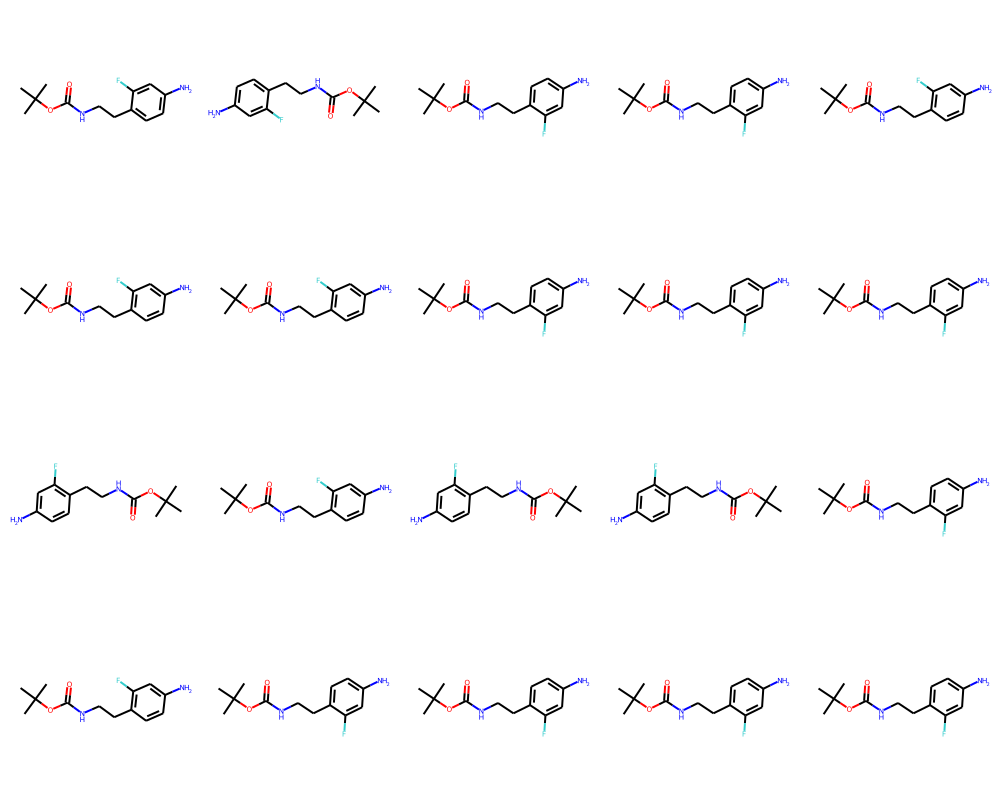

In [15]:
aas = [Chem.MolFromSmiles(x) for x in s][:20]
 
Draw.MolsToGridImage(aas, molsPerRow=5, useSVG=False)

In [5]:
df = pd.DataFrame(list(zip(products, reactant)), 
               columns =['products', 'reactant']).sample(frac=0.1)

In [8]:
df['maximum_augemented'] = df['products'].apply(lambda x: len(randomSmiles(x,1000)) )

In [24]:
len(df)

450

(array([134., 258., 185., 204., 194., 171., 135., 124., 114., 101., 126.,
        122., 144., 101., 101.,  55.,  85.,  89.,  67.,  72.,  76.,  73.,
         84.,  85.,  79.,  93.,  85.,  69.,  58.,  66.,  55.,  59.,  61.,
         63.,  76.,  74.,  69.,  76.,  69.,  58.,  56.,  49.,  61.,  48.,
         36.,  47.,  49.,  61.,  41.,  45.]),
 array([   6.  ,   25.88,   45.76,   65.64,   85.52,  105.4 ,  125.28,
         145.16,  165.04,  184.92,  204.8 ,  224.68,  244.56,  264.44,
         284.32,  304.2 ,  324.08,  343.96,  363.84,  383.72,  403.6 ,
         423.48,  443.36,  463.24,  483.12,  503.  ,  522.88,  542.76,
         562.64,  582.52,  602.4 ,  622.28,  642.16,  662.04,  681.92,
         701.8 ,  721.68,  741.56,  761.44,  781.32,  801.2 ,  821.08,
         840.96,  860.84,  880.72,  900.6 ,  920.48,  940.36,  960.24,
         980.12, 1000.  ]),
 <BarContainer object of 50 artists>)

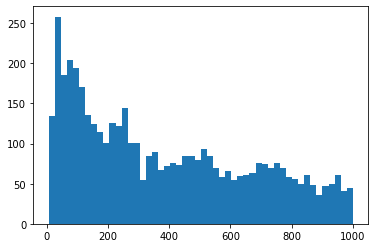

In [7]:
from matplotlib import pyplot as plt
plt.hist(df.maximum_augemented.tolist(),bins=50) 